## Project: Wrangle and Analyze Data (WeRateDogs)

This project is based on tackling with data wrangling efforts.

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gathering)
- [Part II - Assessing Data](#assessing)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Analyzing and visualizing Wrangled data](#analyzing_visualizing)

<a id='intro'></a>
### Introduction

Wrangling and analyzing data is a demanding process for data analyst and its work. In this project, I will use the data wrangling skills to dather data from Twitter,clean them, and do some analysis. Then,I will get the original Twitter data from Twitter user @dog_rates, along with a image prediction dataset.I will document my wrangling efforts in a Jupyter Notebook, and showcase them through analyses and visualizations using Python (and its libraries).

As WeRateDogs is a popular Twitter hash tag,people rate dogs with a denominator of 10 and the numerator is usually higher than 10 to show how lovely the dog is. Furthermore, WeRateDogs has over 4 million followers and has received international media coverage.


<a id='gathering'></a>
### Part I - Gathering Data

Data will be gathered from three resources:

1. The WeRateDogs Twitter archive. The twitter_archive_enhanced.csv file was provided to me.

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file was provided to me.

3. Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting.

In [22]:
# Because tweepy module cannot be encompassed, it should be install as Anaconda Command.
# !pip install tweepy

In [48]:
# import libraries I use to build my project
import numpy as np
import pandas as pd
import requests
import json
import datetime
import tweepy
import sys
import time
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

1. Gathering the WeRateDogs Twitter archive Whose filename is twitter_archive_enhanced.csv

In [98]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Downloading the image predictions file from the Udacity server and writing all content to image_predictions.tsv file

In [99]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Querying Twitter's API for JSON data - match to each Tweet ID from the archive

In [41]:
consumer_key = "UnbSXP1KKBRB1kkx5Ry4Yfezi" # "MY_CUSTOMER_KEY"
consumer_secret = "k9JoR24jMc09Ikl9IPurim8tCsKQNSvSvsw3SgfhO14h3vQwZ9" # "MY_CONSUMER_SECRET"
access_token = "411318653-hFPRaoKqZ0IlCN1nGI4KED7oalEVbak1wKKflBBW" # "ACCESS_TOKEN"
access_secret = "zhyKTfCcFHIH4Gh3C2d2n1svZe6zf9OsXeSQJ704a5lD2" # "ACCESS_SECRET"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

if(api):
    print("Connected Twitter via API")


# As, it has a long time process fo loop part, I would like to calculate how much time is it done.
start = time.time()

errors = []  
tweet_ids = twitter_archive["tweet_id"] 
with open('tweet_json.txt', 'w') as tweet_json_file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)
            json.dump(tweet._json, tweet_json_file)
            tweet_json_file.write('\n')
            print("Tweet ID : {}".format(tweet_id), end="\r")
        except tweepy.TweepError as e:
            errors.append(tweet_id)
            print("Error : {}".format(e), end="\r")
            pass

        
# this stops the timer            
end = time.time()

minutes_time = int( (end - start) / 60)
seconds_time = int( (end - start) % 60)
print("Time the process completed : {} minutes {} seconds ".format(minutes_time, seconds_time))

Connected Twitter via API
Tweet ID : 892420643555336193
Tweet ID : 892177421306343426
Tweet ID : 891815181378084864
Tweet ID : 891689557279858688
Tweet ID : 891327558926688256
Tweet ID : 891087950875897856
Tweet ID : 890971913173991426
Tweet ID : 890729181411237888
Tweet ID : 890609185150312448
Tweet ID : 890240255349198849
Tweet ID : 890006608113172480
Tweet ID : 889880896479866881
Tweet ID : 889665388333682689
Tweet ID : 889638837579907072
Tweet ID : 889531135344209921
Tweet ID : 889278841981685760
Tweet ID : 888917238123831296
Tweet ID : 888804989199671297
Tweet ID : 888554962724278272
Error : [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet ID : 888078434458587136
Tweet ID : 887705289381826560
Tweet ID : 887517139158093824
Tweet ID : 887473957103951883
Tweet ID : 887343217045368832
Tweet ID : 887101392804085760
Tweet ID : 886983233522544640
Tweet ID : 886736880519319552
Tweet ID : 886680336477933568
Tweet ID : 886366144734445568
Tweet ID : 886267009285017600
Tweet 

Tweet ID : 843235543001513987
Error : [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet ID : 842846295480000512
Tweet ID : 842765311967449089
Tweet ID : 842535590457499648
Tweet ID : 842163532590374912
Tweet ID : 842115215311396866
Tweet ID : 841833993020538882
Tweet ID : 841680585030541313
Tweet ID : 841439858740625411
Tweet ID : 841320156043304961
Tweet ID : 841314665196081154
Tweet ID : 841077006473256960
Tweet ID : 840761248237133825
Tweet ID : 840728873075638272
Tweet ID : 840698636975636481
Tweet ID : 840696689258311684
Tweet ID : 840632337062862849
Tweet ID : 840370681858686976
Tweet ID : 840268004936019968
Tweet ID : 839990271299457024
Tweet ID : 839549326359670784
Tweet ID : 839290600511926273
Tweet ID : 839239871831150596
Tweet ID : 838952994649550848
Tweet ID : 838921590096166913
Tweet ID : 838916489579200512
Tweet ID : 838831947270979586
Tweet ID : 838561493054533637
Tweet ID : 838476387338051585
Tweet ID : 838201503651401729
Tweet ID : 838150277551247360
Tw

Tweet ID : 809084759137812480
Tweet ID : 808838249661788160
Tweet ID : 808733504066486276
Tweet ID : 808501579447930884
Tweet ID : 808344865868283904
Tweet ID : 808134635716833280
Tweet ID : 808106460588765185
Tweet ID : 808001312164028416
Tweet ID : 807621403335917568
Tweet ID : 807106840509214720
Tweet ID : 807059379405148160
Tweet ID : 807010152071229440
Tweet ID : 806629075125202948
Tweet ID : 806620845233815552
Tweet ID : 806576416489959424
Tweet ID : 806542213899489280
Tweet ID : 806242860592926720
Tweet ID : 806219024703037440
Tweet ID : 805958939288408065
Tweet ID : 805932879469572096
Tweet ID : 805826884734976000
Tweet ID : 805823200554876929
Tweet ID : 805520635690676224
Tweet ID : 805487436403003392
Tweet ID : 805207613751304193
Tweet ID : 804738756058218496
Tweet ID : 804475857670639616
Tweet ID : 804413760345620481
Tweet ID : 804026241225523202
Tweet ID : 803773340896923648
Tweet ID : 803692223237865472
Tweet ID : 803638050916102144
Tweet ID : 803380650405482500
Tweet ID :

Rate limit reached. Sleeping for: 414


Tweet ID : 786729988674449408
Tweet ID : 786709082849828864
Tweet ID : 786664955043049472
Tweet ID : 786595970293370880
Tweet ID : 786363235746385920
Tweet ID : 786286427768250368
Tweet ID : 786233965241827333
Tweet ID : 786051337297522688
Tweet ID : 786036967502913536
Tweet ID : 785927819176054784
Tweet ID : 785872687017132033
Tweet ID : 785639753186217984
Tweet ID : 785533386513321988
Tweet ID : 785515384317313025
Tweet ID : 785264754247995392
Tweet ID : 785170936622350336
Tweet ID : 784826020293709826
Tweet ID : 784517518371221505
Tweet ID : 784431430411685888
Tweet ID : 784183165795655680
Tweet ID : 784057939640352768
Tweet ID : 783839966405230592
Tweet ID : 783821107061198850
Tweet ID : 783695101801398276
Tweet ID : 783466772167098368
Tweet ID : 783391753726550016
Tweet ID : 783347506784731136
Tweet ID : 783334639985389568
Tweet ID : 783085703974514689
Tweet ID : 782969140009107456
Tweet ID : 782747134529531904
Tweet ID : 782722598790725632
Tweet ID : 782598640137187329
Tweet ID :

Tweet ID : 751251247299190784
Tweet ID : 751205363882532864
Tweet ID : 751132876104687617
Tweet ID : 750868782890057730
Tweet ID : 750719632563142656
Tweet ID : 750506206503038976
Tweet ID : 750429297815552001
Tweet ID : 750383411068534784
Tweet ID : 750381685133418496
Tweet ID : 750147208377409536
Tweet ID : 750132105863102464
Tweet ID : 750117059602808832
Tweet ID : 750101899009982464
Tweet ID : 750086836815486976
Tweet ID : 750071704093859840
Tweet ID : 750056684286914561
Tweet ID : 750041628174217216
Tweet ID : 750026558547456000
Tweet ID : 750011400160841729
Tweet ID : 749996283729883136
Tweet ID : 749981277374128128
Tweet ID : 749774190421639168
Tweet ID : 749417653287129088
Tweet ID : 749403093750648834
Tweet ID : 749395845976588288
Tweet ID : 749317047558017024
Tweet ID : 749075273010798592
Tweet ID : 749064354620928000
Tweet ID : 749036806121881602
Tweet ID : 748977405889503236
Tweet ID : 748932637671223296
Tweet ID : 748705597323898880
Tweet ID : 748699167502000129
Tweet ID :

Tweet ID : 712809025985978368
Tweet ID : 712717840512598017
Tweet ID : 712668654853337088
Tweet ID : 712438159032893441
Tweet ID : 712309440758808576
Tweet ID : 712097430750289920
Tweet ID : 712092745624633345
Tweet ID : 712085617388212225
Tweet ID : 712065007010385924
Tweet ID : 711998809858043904
Tweet ID : 711968124745228288
Tweet ID : 711743778164514816
Tweet ID : 711732680602345472
Tweet ID : 711694788429553666
Tweet ID : 711652651650457602
Tweet ID : 711363825979756544
Tweet ID : 711306686208872448
Tweet ID : 711008018775851008
Tweet ID : 710997087345876993
Tweet ID : 710844581445812225
Tweet ID : 710833117892898816
Tweet ID : 710658690886586372
Tweet ID : 710609963652087808
Tweet ID : 710588934686908417
Tweet ID : 710296729921429505
Tweet ID : 710283270106132480
Tweet ID : 710272297844797440
Tweet ID : 710269109699739648
Tweet ID : 710153181850935296
Tweet ID : 710140971284037632
Tweet ID : 710117014656950272
Tweet ID : 709918798883774466
Tweet ID : 709901256215666688
Tweet ID :

Tweet ID : 691675652215414786
Tweet ID : 691483041324204033
Tweet ID : 691459709405118465
Tweet ID : 691444869282295808
Tweet ID : 691416866452082688
Tweet ID : 691321916024623104
Tweet ID : 691096613310316544
Tweet ID : 691090071332753408
Tweet ID : 690989312272396288
Tweet ID : 690959652130045952
Tweet ID : 690938899477221376
Tweet ID : 690932576555528194
Tweet ID : 690735892932222976
Tweet ID : 690728923253055490
Tweet ID : 690690673629138944
Tweet ID : 690649993829576704
Tweet ID : 690607260360429569
Tweet ID : 690597161306841088
Tweet ID : 690400367696297985
Tweet ID : 690374419777196032
Tweet ID : 690360449368465409
Tweet ID : 690348396616552449
Tweet ID : 690248561355657216
Tweet ID : 690021994562220032
Tweet ID : 690015576308211712
Tweet ID : 690005060500217858
Tweet ID : 689999384604450816
Tweet ID : 689993469801164801
Tweet ID : 689977555533848577
Tweet ID : 689905486972461056
Tweet ID : 689877686181715968
Tweet ID : 689835978131935233
Tweet ID : 689661964914655233
Tweet ID :

Rate limit reached. Sleeping for: 509


Tweet ID : 686377065986265092
Tweet ID : 686358356425093120
Tweet ID : 686286779679375361
Tweet ID : 686050296934563840
Tweet ID : 686035780142297088
Tweet ID : 686034024800862208
Tweet ID : 686007916130873345
Tweet ID : 686003207160610816
Tweet ID : 685973236358713344
Tweet ID : 685943807276412928
Tweet ID : 685906723014619143
Tweet ID : 685681090388975616
Tweet ID : 685667379192414208
Tweet ID : 685663452032069632
Tweet ID : 685641971164143616
Tweet ID : 685547936038666240
Tweet ID : 685532292383666176
Tweet ID : 685325112850124800
Tweet ID : 685321586178670592
Tweet ID : 685315239903100929
Tweet ID : 685307451701334016
Tweet ID : 685268753634967552
Tweet ID : 685198997565345792
Tweet ID : 685169283572338688
Tweet ID : 684969860808454144
Tweet ID : 684959798585110529
Tweet ID : 684940049151070208
Tweet ID : 684926975086034944
Tweet ID : 684914660081053696
Tweet ID : 684902183876321280
Tweet ID : 684880619965411328
Tweet ID : 684830982659280897
Tweet ID : 684800227459624960
Tweet ID :

Tweet ID : 675349384339542016
Tweet ID : 675334060156301312
Tweet ID : 675166823650848770
Tweet ID : 675153376133427200
Tweet ID : 675149409102012420
Tweet ID : 675147105808306176
Tweet ID : 675146535592706048
Tweet ID : 675145476954566656
Tweet ID : 675135153782571009
Tweet ID : 675113801096802304
Tweet ID : 675111688094527488
Tweet ID : 675109292475830276
Tweet ID : 675047298674663426
Tweet ID : 675015141583413248
Tweet ID : 675006312288268288
Tweet ID : 675003128568291329
Tweet ID : 674999807681908736
Tweet ID : 674805413498527744
Tweet ID : 674800520222154752
Tweet ID : 674793399141146624
Tweet ID : 674790488185167872
Tweet ID : 674788554665512960
Tweet ID : 674781762103414784
Tweet ID : 674774481756377088
Tweet ID : 674767892831932416
Tweet ID : 674764817387900928
Tweet ID : 674754018082705410
Tweet ID : 674752233200820224
Tweet ID : 674743008475090944
Tweet ID : 674742531037511680
Tweet ID : 674739953134403584
Tweet ID : 674737130913071104
Tweet ID : 674690135443775488
Tweet ID :

Tweet ID : 670003130994700288
Tweet ID : 669993076832759809
Tweet ID : 669972011175813120
Tweet ID : 669970042633789440
Tweet ID : 669942763794931712
Tweet ID : 669926384437997569
Tweet ID : 669923323644657664
Tweet ID : 669753178989142016
Tweet ID : 669749430875258880
Tweet ID : 669684865554620416
Tweet ID : 669683899023405056
Tweet ID : 669682095984410625
Tweet ID : 669680153564442624
Tweet ID : 669661792646373376
Tweet ID : 669625907762618368
Tweet ID : 669603084620980224
Tweet ID : 669597912108789760
Tweet ID : 669583744538451968
Tweet ID : 669573570759163904
Tweet ID : 669571471778410496
Tweet ID : 669567591774625800
Tweet ID : 669564461267722241
Tweet ID : 669393256313184256
Tweet ID : 669375718304980992
Tweet ID : 669371483794317312
Tweet ID : 669367896104181761
Tweet ID : 669363888236994561
Tweet ID : 669359674819481600
Tweet ID : 669354382627049472
Tweet ID : 669353438988365824
Tweet ID : 669351434509529089
Tweet ID : 669328503091937280
Tweet ID : 669327207240699904
Tweet ID :

In [42]:
print(errors)

[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 851953902622658560, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 759566828574212096, 754011816964026368, 680055455951884288]


4. Using the Python Tweepy library , Gathering retweet count and like of tweet count thanks to the usage of the Twitter API

Reference Link :https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

In [100]:
extracted_tweet_data = [] 
with open('tweet_json.txt') as tweet_json_file:  # tweet-json.txt
    for line in tweet_json_file: 
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
        extracted_tweet_data.append(
                                        {
                                         'tweet_id': tweet_id,
                                         'retweet_count': int(retweet_count),
                                         'favorite_count': int(favorite_count),
                                        }
                                   )
        

twitter_api_extracted_data = pd.DataFrame(extracted_tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count']) 

<a id='assessing'></a>
### Part II - Assessing Data

In ths part, I determine whether all dataset is convenient or not by defining quality issues and tidiness issues.

Here are the features of both quality issues and tidiness issues shown below.

The four features of quality issues:

1. Completeness: Does a dataset have missing data?
2. Validity: Does a dataset make sense?
3. Accuracy: Does a dataset contain inaccurate data?
4. Consistency: Does the data of each row has standardization?

Three features for tidiness:

1. Each variable is defined only just in one column
2. Duplicate rows cannot be contained in dataset.
3. If dataset is combined with another one, the column of both all dataset applying join process should be same type.  

First, I assess twitter_archive dataset to find all kinds of issues defined above.

#### twitter_archive

<ul>
<li><i>tweet_id:</i> the unique identifier of tweets</li>
<li> <i>in_reply_to_status_id:</i> if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID</li>
<li><i>in_reply_to_user_id:</i> if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID</li>
<li> <i>timestamp:</i> timestamp creation of the Tweet</li>
<li> <i>source:</i> device from where the Tweet was posted, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client</li>
<li> text: actual text of the status update</li>

<li> <i>retweeted_status_id:</i> if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID</li>

<li> <i>retweeted_status_user_id:</i> if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID</li>

<li> <i>retweeted_status_timestamp:</i> timestamp of retweet</li>

<li> <i>expanded_urls:</i> tweet URL</li>

<li> <i>rating_numerator:</i> numerator of the rating of a dog</li>

<li> <i>rating_denominator:</i> denominator of the rating of a dog</li>

<li> <i>name:</i> name of the dog</li>

<li> <i>doggo:</i> respective dog stage</li>

<li> <i>floofer:</i> respective dog stage</li>

<li> <i>pupper:</i> respective dog stage</li>

<li> <i>puppo:</i> respective dog stage</li>
<ul>

In [101]:
# Show first 5 data of twitter_archive dataframe
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [102]:
# Show last 5 data of twitter_archive dataframe
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [103]:
# Show how many variables there are in twitter_archive dataframe
twitter_archive.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [104]:
# Show detailed information of each column about the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [105]:
# Show descriptive statistics of twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [106]:
# Deterime the number of duplicate values with respect too twitter_id column in twitter_archive dataframe
sum(twitter_archive['tweet_id'].duplicated())

0

In [107]:
# Show the number of numerators with counts of each data value in twitter_archive dataframe
twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [108]:
# Show the number of names with counts of each data value in twitter_archive dataframe
twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Daisy             7
Bailey            7
Toby              7
Buddy             7
Bella             6
Jax               6
Rusty             6
Jack              6
Scout             6
Koda              6
Stanley           6
Milo              6
Leo               6
Oscar             6
Dave              6
Chester           5
               ... 
Bubba             1
Maude             1
Bauer             1
Alexanderson      1
Marq              1
Zuzu              1
Toffee            1
Vince             1
Ralphy            1
Rascal            1
Tedrick           1
Ivar              1
Ralphie           1
Liam              1
Jiminus           1
Marlee            1
Jackie            1
Laela             1
Robin             1


In [109]:
# Show the number of rating denominators with counts of each data value in twitter_archive dataframe
twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [110]:
# Show source value for the first value of twitter_archive dataframe
twitter_archive["source"][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [111]:
# Show None value of name for twitter_archive dataframe
twitter_archive[twitter_archive["name"] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [112]:
# Show Null values of each column in twitter archive dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [113]:
# Check whether duplicated values exist or not in twitter archive dataframe
twitter_archive.duplicated().sum()

0

In [114]:
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


After assessing first dataframe named for twitter_archive, Here are the results derived from its assessment. 
#### twitter_archive:

##### Quality Issues
<ul>
<li>
    <b>Completeness:</b>
    <ul>
        <li>missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls</li>
        <li>All tweet_id is int type so that other tables' tweet id should be int type </li>
    </ul>        
</li>
<li>
    <b>Validity:</b>
    <ul>
        <li>Dog names: some dogs contain 'None', 'a', and 'an.'</li>
        <li>Because this dataset includes retweets part and it leads to duplicated data, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are empty.</li>
    </ul>    
</li>    
<li>
    <b>Accuracy:</b>
    <ul>
        <li>The last value of rating_numerator is 1776</li>
        <li>timestamp is defined as an object instead of datetime</li>
        <li>retweeted_status_timestamp is defined as an object instead of datetime</li>
    </ul>    
</li>           
<li>
    <b>Consistency:</b>
    <ul>
        <li>Source column contains the HTML tags</li>
        <li>Value of rating_denominator column should be 10 as a standart, but there are an other values such as 11, 50 80</li>
    </ul>    
</li>    

</ul>    


##### Tideness Issues

<ul>
    <li>
       The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo) instead of defined only just one column named for dog_stage as categorial approach.
    </li>
</ul>    

Secondly, I assess image_predictions dataset to find all kinds of issues defined above.


#### image_predictions
<ul>
<li><i>tweet_id:</i> the unique identifier of tweet</li>
<li><i>jpg_url:</i> dog's image URL</li>
<li><i>img_num:</i> the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)</li>
<li><i>p1:</i> algorithm's #1 prediction for the image in the tweet</li>
<li><i>p1_conf:</i> how confident the algorithm is in its #1 prediction</li>
<li><i>p1_dog:</i> whether or not the #1 prediction is a breed of dog</li>
<li><i>p2:</i> algorithm's #2 prediction for the image in the tweet</li>
<li><i>p2_conf:</i>  how confident the algorithm is in its #2 prediction</li>
<li><i>p2_dog:</i> whether or not the #2 prediction is a breed of dog</li>
<li><i>p3:</i> algorithm's #3 prediction for the image in the tweet</li>
<li><i>p3_conf:</i> how confident the algorithm is in its #3 prediction</li>
<li><i>p3_dog:</i> whether or not the #3 prediction is a breed of dog!</li>
<ul>

In [115]:
# Get first 5 rows from image predictions dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [116]:
# Get last 5 rows from image predictions dataframe
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [117]:
# Show detailed information of each column about the image prediction dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [118]:
# Show descriptive statistics of image predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [120]:
# This is an image for tweet_id 666020888022790149
id_image = image_predictions[image_predictions["tweet_id"] == 666020888022790149]["jpg_url"].values[0]
# show images Via Image Library
Image(url = str(id_image))

In [121]:
# Check whether duplicated tweet_id values exist or not in image predictions dataframe
image_predictions[image_predictions["tweet_id"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [122]:
# Show the sum of duplicated jpg_url values of image predictions dataframe
sum(image_predictions['jpg_url'].duplicated())

66

In [123]:
# Get the exct duplicate records.The expected number is 132 because of 66*2
image_predictions_df_images_duplicates = image_predictions[image_predictions["jpg_url"].duplicated(keep=False)]
image_predictions_df_images_duplicates.sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [127]:
# Check whether duplicated values exist o r not in image prediction dataframe
image_predictions.duplicated().sum()

0

In [128]:
# Show Null values of each column in image prediction dataframe
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [129]:
# Show what different kinds of values there are in p1,p2,p3 columns
print("p1 Column")
print(image_predictions['p1'].value_counts())
print("-------------------------------")


p1 Column
golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16


In [130]:
print("p2 Column")
print(image_predictions['p2'].value_counts())
print("-------------------------------")

p2 Column
Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
St

In [63]:
print("p3 Column")
print(image_predictions['p3'].value_counts())
print("-------------------------------")

p3 Column
Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog           

After assessing first dataframe named for image_predictions, Here are the results derived from its assessment. 
#### image_predictions:

##### Quality Issues
<ul>
<li>
    <b>Completeness:</b>
    <ul>
        <li>No missing data in all columns</li>
        <li>All tweet_id is int type so that other tables' tweet id should be int type </li>
    </ul>        
</li>
<li>
    <b>Validity:</b>
    <ul>
        <li>p1, p2 and p3 columns have invalid data</li>
        <li>Multiple duplicated jpg_url (66 records)</li>
    </ul>    
</li>    
<li>
    <b>Accuracy:</b>
    <ul>
        <li>No Accuracy Issue</li>
    </ul>    
</li>           
<li>
    <b>Consistency:</b>
    <ul>
        <li>Values in columns p1, p2, p3 contain "-" and "_" for values with more than one word</li>
        <li>Values in columns p1, p2, p3 are in mixed cases(lower/upper)</li>
    </ul>    
</li>    

</ul>    


##### Tideness Issues

<ul>
    <li>
        Delete all duplicated jpg_url tweets.
    </li>
    <li>
        Delete columns that cannot be used for analysis
    </li>
</ul>    

#### twitter_api_extracted_data
<ul>
<li><i>tweet_id:</i> the unique identifier of tweets</li>
<li><i>retweet_count:</i> number of times this Tweet has been retweeted</li>
<li><i>favorite_count:</i> indicates approximately how many times this Tweet has been liked by Twitter users!</li>
<ul>

In [131]:
# Get first 5 rows from twitter_api_extracted_data dataframe
twitter_api_extracted_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7803,36633
1,892177421306343426,5780,31561
2,891815181378084864,3825,23774
3,891689557279858688,7970,39950
4,891327558926688256,8604,38153


In [132]:
# Get last 5 rows from twitter_api_extracted_data dataframe
twitter_api_extracted_data.tail()

,tweet_id,retweet_count,favorite_count
2326,666049248165822465,41,99
2327,666044226329800704,133,273
2328,666033412701032449,41,115
2329,666029285002620928,43,121
2330,666020888022790149,470,2447


In [133]:
# Show detailed information of each column about the twitter_api_extracted_data dataframe
twitter_api_extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [134]:
# Show descriptive statistics of twitter_api_extracted_data dataframe
twitter_api_extracted_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2741.518662,7653.821536
std,6.823170e+16,4636.063127,11876.340787
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,554.500000,1338.000000
50%,7.182469e+17,1287.000000,3333.000000
75%,7.986692e+17,3191.000000,9387.000000
max,8.924206e+17,78879.000000,158283.000000


In [135]:
# Show how many variables there are in twitter_api_extracted_data dataframe
twitter_api_extracted_data.count()

tweet_id          2331
retweet_count     2331
favorite_count    2331
dtype: int64

In [136]:
# Check whether duplicated values exist o r not in twitter_api_extracted_data dataframe
sum(twitter_api_extracted_data['tweet_id'].duplicated())

0

In [137]:
# Show Null values of each column in twitter_api_extracted_data
twitter_api_extracted_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [138]:
# Show how many different kinds of variable there are in favorite_count of twitter_api_extracted_data dataframe
twitter_api_extracted_data['favorite_count'].value_counts()

0        163
1381       3
1541       3
1079       3
318        3
1617       3
931        3
3686       3
431        3
3722       3
2090       3
3446       3
1170       3
235        3
2666       2
4713       2
6774       2
21636      2
2253       2
2238       2
322        2
1081       2
734        2
201        2
3621       2
1085       2
301        2
3881       2
4446       2
1107       2
        ... 
2602       1
2600       1
1358       1
549        1
4593       1
8863       1
12791      1
2552       1
4601       1
507        1
2558       1
8705       1
23044      1
517        1
10758      1
2570       1
523        1
33293      1
10766      1
18960      1
8721       1
8314       1
32583      1
539        1
12829      1
2360       1
2592       1
545        1
23076      1
11698      1
Name: favorite_count, Length: 1998, dtype: int64

In [15]:
# Show how many different kinds of variable there are in retweet_count of twitter_api_extracted_data dataframe
twitter_api_extracted_data['retweet_count'].value_counts()

231      5
227      5
230      5
561      5
609      5
54       4
630      4
3478     4
114      4
199      4
127      4
74       4
1107     4
648      4
1993     4
621      4
578      4
499      4
504      4
4923     4
1040     4
679      4
667      4
750      3
203      3
1381     3
1297     3
1150     3
1672     3
1088     3
        ..
6120     1
1120     1
2030     1
6132     1
862      1
14098    1
1        1
3        1
182      1
7        1
2004     1
2002     1
1940     1
1650     1
3991     1
1950     1
1207     1
1203     1
4003     1
4011     1
4015     1
4017     1
1153     1
6068     1
1976     1
3248     1
1988     1
1996     1
240      1
2047     1
Name: retweet_count, Length: 1681, dtype: int64

In [139]:
# Show the name of each column in twitter_archive dataframe
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [140]:
# Show the name of each column in image_predictions dataframe
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [141]:
# Show the name of each column in twitter_api_extracted_data dataframe
list(twitter_api_extracted_data)

['tweet_id', 'retweet_count', 'favorite_count']

In [142]:
# Check for duplicated columns in all these 3 datasets
duplicated_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_api_extracted_data))
duplicated_columns[duplicated_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

After assessing first dataframe named for twitter_api_extracted_data, Here are the results derived from its assessment. 
#### twitter_api_extracted_data:

##### Quality Issues
<ul>
<li>
    <b>Completeness:</b>
    <ul>
        <li>No missing data in all columns</li>
    </ul>        
</li>
<li>
    <b>Validity:</b>
    <ul>
        <li>No Validity Issues</li>
    </ul>    
</li>    
<li>
    <b>Accuracy:</b>
    <ul>
        <li>No Accuracy Issue</li>
    </ul>    
</li>           
<li>
    <b>Consistency:</b>
    <ul>
        <li>No Consistency Issues</li>
    </ul>    
</li>    

</ul>    


##### Tideness Issues

<ul>
    <li>
        No Tideness Issues
    </li>
</ul>    

<a id='cleaning'></a>
### Part III - Cleaning Data

In this part, the process consists of the cleaning portion of the data wrangling process shown below as itemizing each one:

1. Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.

2. Code: convert those definitions to code and run that code.

3. Test: test your dataset, visually or with code, to make sure your cleaning operations worked.

### Define

1. Remove Five unessential columns named for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp in twitter_archive dataframe.

2. Change the timestamp to correct datetime format in twitter_archive dataframe.

3. Remove unessential html tags in source column of twitter_archive dataframe.

4. Dog names: some dogs contain 'None', 'a', and 'an.'. All these names are changed as "None". 

5. The four columns in twitter_archive dataframe which are doggo, floof, pupper and puppo should be merged into one column named stage.

6. Drop duplicated jpg_url and delete columns that won't be used for analysis in image_predictions dataframe.  

7. Change Non-descriptive column names named for p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog into descriptive column names named for first_prediction, first_confidence, first_dog, second_prediction, second_confidence, second_dog, third_prediction, third_confidence, third_dog consecutively in image_predictions dataframe. 

8. Merge all the 3 dataframe named for twitter_archive, image_predictions, twitter_api_extracted_data to one dataframe based on tweet_id.


In [143]:
# Make a copy of the all these 3 dataframes as table before doing the process of cleaning
twitter_archive_clean_df = twitter_archive.copy()
image_predictions_clean_df = image_predictions.copy()
twitter_api_extracted_data_clean_df = twitter_api_extracted_data.copy()

<b>Define 1:</b> Remove Five unessential columns named for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp in twitter_archive dataframe.

In [144]:
# Code
twitter_archive_clean_df.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis = 1, inplace=True)

In [145]:
# Test
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


<b>Define 2 :</b> Change the timestamp to correct datetime format in twitter_archive dataframe.

In [146]:
# Code
#Remove the time zone from the 'timestamp' column
twitter_archive_clean_df['timestamp'] = twitter_archive_clean_df['timestamp'].str.slice(start=0, stop=-6)

# Change the 'timestamp' column to a datetime object
twitter_archive_clean_df['timestamp'] = pd.to_datetime(twitter_archive_clean_df['timestamp'], errors = 'coerce', format = "%Y-%m-%d %H:%M:%S")

In [147]:
# Test
twitter_archive_clean_df.loc[0]

tweet_id                                             892420643555336193
timestamp                                           2017-08-01 16:23:56
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Phineas. He's a mystical boy. Only eve...
expanded_urls         https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                            Phineas
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 0, dtype: object

<b>Define 3 :</b> Remove unessential html tags in source column of twitter_archive dataframe.

In [148]:
# Code
twitter_archive_clean_df["source"] = twitter_archive_clean_df["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

twitter_archive_clean_df["source"] = twitter_archive_clean_df["source"].astype('category')

In [149]:
# Test
twitter_archive_clean_df["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

<b>Define 4 :</b> Dog names: some dogs contain 'None', 'a', and 'an.'. All these names are changed as "None".

In [150]:
# Code
# Create the array of small letter words (all are dictionary words) in the 'name' column.
non_names_dog = twitter_archive_clean_df["name"][(twitter_archive_clean_df["name"].str.islower() == True)].values

# Print the non_names_dog array
print(non_names_dog)   
        

['such' 'a' 'quite' 'quite' 'quite' 'not' 'one' 'incredibly' 'a' 'mad'
 'an' 'very' 'a' 'very' 'just' 'my' 'one' 'not' 'his' 'one' 'a' 'a' 'a'
 'an' 'very' 'actually' 'a' 'just' 'getting' 'mad' 'very' 'this'
 'unacceptable' 'all' 'a' 'old' 'a' 'infuriating' 'a' 'a' 'a' 'an' 'a' 'a'
 'very' 'getting' 'just' 'a' 'the' 'the' 'actually' 'by' 'a' 'officially'
 'a' 'the' 'the' 'a' 'a' 'a' 'a' 'life' 'a' 'one' 'a' 'a' 'a' 'light'
 'just' 'space' 'a' 'the' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'an' 'a'
 'the' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'quite' 'a' 'an' 'a'
 'an' 'the' 'the' 'a' 'a' 'an' 'a' 'a' 'a' 'a']


In [151]:
twitter_archive_clean_df.replace(to_replace = non_names_dog, value = np.NaN, inplace = True)

In [152]:
# Test

# Re-create the non_names_dog array and it must be an empty array now.
non_names_dog = twitter_archive_clean_df.name[(twitter_archive_clean_df.name.str.islower() == True)].values
print(non_names_dog)

[]


<b>Define 5 :</b> The four columns in twitter_archive dataframe which are doggo, floof, pupper and puppo should be merged into one column named stage.

In [153]:
# Code

## Melt the doggo, floofer, pupper and puppo columns to dog and dogs_blood columns
twitter_archive_clean_df = pd.melt(twitter_archive_clean_df, 
                                   id_vars=['tweet_id', 
                                            'timestamp',
                                            'source',
                                            'text',
                                            'expanded_urls',
                                            'rating_numerator',
                                            'rating_denominator',
                                            'name'],
                               var_name='dog', value_name='stage')

## Drop dog column
twitter_archive_clean_df = twitter_archive_clean_df.drop('dog', 1)

## Sort by dogs_blood column and then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean_df = twitter_archive_clean_df.sort_values('stage').drop_duplicates(subset='tweet_id',keep='last')

In [154]:
# Test
twitter_archive_clean_df['stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage, dtype: int64

<b>Define 6 :</b> Drop duplicated jpg_url in image_predictions dataframe.

In [155]:
# Code
image_predictions_clean_df = image_predictions_clean_df.drop_duplicates(subset=['jpg_url'], keep='last')

In [156]:
# Test
sum(image_predictions_clean_df['jpg_url'].duplicated())

0

<b>Define 7 :</b> Change Non-descriptive column names named for p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog into descriptive column names named for first_prediction, first_confidence, first_dog, second_prediction, second_confidence, second_dog, third_prediction, third_confidence, third_dog consecutively in image_predictions dataframe

In [157]:
# Code
image_predictions_clean_df.rename(index = str, columns={"p1": "first_prediction",
                                        "p1_conf": "first_confidence",
                                        "p1_dog": "first_dog",
                                        "p2": "second_prediction",
                                        "p2_conf": "second_confidence",
                                        "p2_dog": "second_dog",
                                        "p3": "third_prediction",
                                        "p3_conf": "third_confidence",
                                        "p3_dog": "third_dog"}, inplace = True)

In [158]:
# Test
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2009 non-null int64
jpg_url              2009 non-null object
img_num              2009 non-null int64
first_prediction     2009 non-null object
first_confidence     2009 non-null float64
first_dog            2009 non-null bool
second_prediction    2009 non-null object
second_confidence    2009 non-null float64
second_dog           2009 non-null bool
third_prediction     2009 non-null object
third_confidence     2009 non-null float64
third_dog            2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


<b>Define 8 :</b> Merge all the 3 dataframe named for twitter_archive, image_predictions, twitter_api_extracted_data to one dataframe based on tweet_id.

In [159]:
# Code
##Join all tables on Left Join using the Tweet_ID column
twitter_main_df = pd.merge(twitter_archive_clean_df,image_predictions_clean_df, how = 'left', on = ['tweet_id'])

# Only keeping rows that have pictures (jpg_url)
twitter_main_df = twitter_main_df[twitter_main_df['jpg_url'].notnull()]


##Create a new dataframe that merge full_twitter_df and tweet_json_df_clean
twitter_main_df = pd.merge(twitter_main_df, twitter_api_extracted_data, how = 'left', on = ['tweet_id'])

In [160]:
# Test
twitter_main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,33.0,0.0
1,667550882905632768,2015-11-20 03:51:47,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,...,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,32.0,0.0
2,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,2183.0,5604.0
3,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False,118.0,331.0
4,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,505.0,840.0


In [161]:
twitter_main_df.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
2004,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,630.0,3002.0
2005,825535076884762624,2017-01-29 02:44:34,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,...,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,17923.0,57938.0
2006,825026590719483904,2017-01-27 17:04:02,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,...,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True,1297.0,6463.0
2007,803773340896923648,2016-11-30 01:31:12,Twitter for iPhone,This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,...,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True,2856.0,10387.0
2008,859607811541651456,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,puppo,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,...,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True,1503.0,18109.0


In [162]:
twitter_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
tweet_id              2009 non-null int64
timestamp             2009 non-null datetime64[ns]
source                2009 non-null category
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  1911 non-null object
stage                 2009 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null float64
first_prediction      2009 non-null object
first_confidence      2009 non-null float64
first_dog             2009 non-null object
second_prediction     2009 non-null object
second_confidence     2009 non-null float64
second_dog            2009 non-null object
third_prediction      2009 non-null object
third_confidence      2009 non-null float64
third_dog             2009 non-null object
retweet_count         

In [164]:
# Write dataframe to csv file named for
twitter_main_df.to_csv('twitter_main.csv', encoding='utf-8', index=False)

In [4]:
# Get all data from twitter_main.csv file
twitter_analyze_visualize_df = pd.read_csv('twitter_main.csv')

In [166]:
twitter_analyze_visualize_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,33.0,0.0
1,667550882905632768,2015-11-20 03:51:47,Twitter Web Client,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,...,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,32.0,0.0
2,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,2183.0,5604.0
3,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False,118.0,331.0
4,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,505.0,840.0


<a id='analyzing_visualizing'></a>
### Part IV - Analyzing and Visualizing Wrangled data


In this part, there are some different kinds of graphs and images based on analyzing and visualizing wrangle data named for twitter_analyze_visualize_df. All these are itemized in detail below.

1. Which sources are used for retweet,favorite tweet?
2. Which are the most 10 popular dog names?
3. Which is the most favorite and retweeted tweet?
4. What is the favorite and retweeted tweet count in terms of dog breeds based on first prediction second prediction, third prediction?
5. What is the distribution of dogs' stage?
6. How have the Retweet and Favorite Counts been changed over the time?

#### 1. Which sources are used for retweet,favorite tweet?  

In [167]:
# show Which sources are used for retweet,favorite tweet
twitter_analyze_visualize_df["source"].value_counts()

Twitter for iPhone    1970
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

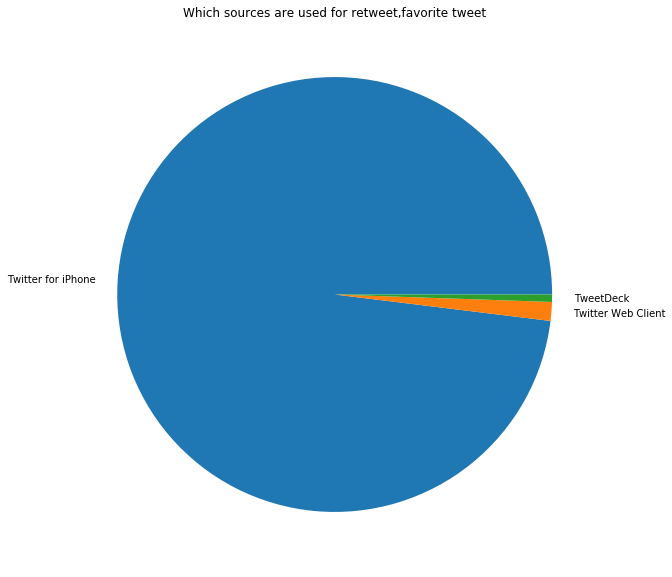

In [169]:
# show it via pie chart
twitter_analyze_visualize_df["source"].value_counts().plot(kind='pie', 
                                                           label='', 
                                                           title='Which sources are used for retweet,favorite tweet');
plt.rcParams["figure.figsize"] = [15, 10]

#### 2. Which are the most 10 popular dog names?

In [170]:
# show which the most 10 popular dog names are
twitter_analyze_visualize_df['name'].value_counts().head(10)

None       561
Charlie     11
Lucy        10
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         7
Name: name, dtype: int64

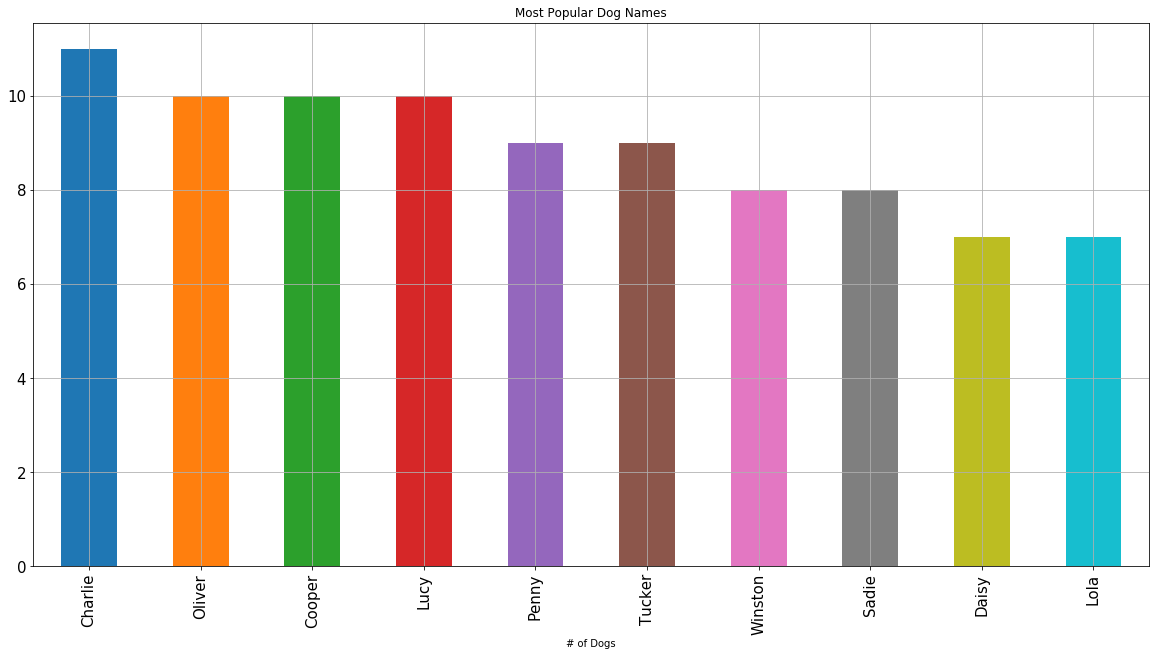

In [171]:
# By not taking into account "None" value, show  the most 10 popular dog names.
dogs_names = twitter_analyze_visualize_df.query('name != "None"')
most_popular_dog_names_10 = dogs_names['name'].value_counts().head(10)

most_popular_dog_names_10.plot(kind='bar', figsize=(20,10),grid=True, fontsize =15,
             title = 'Most Popular Dog Names').set_xlabel('# of Dogs')
 
plt.show()

#### 3. Which is the most favorite and retweeted tweet?

In [172]:
most_favorite_and_retweeted_tweet = twitter_analyze_visualize_df.sort_values(['retweet_count', 'favorite_count'], ascending=[False, False]).head(1)
most_favorite_and_retweeted_tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
1755,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,78879.0,158283.0


In [173]:
# This is an image for tweet_id 744234799360020481
id_image = most_favorite_and_retweeted_tweet[most_favorite_and_retweeted_tweet["tweet_id"] == 744234799360020481]["jpg_url"].values[0]
# show images Via Image Library
Image(url = str(id_image))

#### 4. What is the favorite and retweeted tweet count in terms of dog breeds based on first prediction second prediction, third prediction?

In [7]:
# create a dataframe with only the rows based on favorite_count and retweet_count in terms of their "True" values in first prediction,second_prediction,third_prediction
retweet_favorite_df_prediction_df = twitter_analyze_visualize_df.query('first_dog == True and second_dog == True and third_dog == True')
retweet_favorite_df_prediction_1_df = retweet_favorite_df_prediction_df[['favorite_count', 'retweet_count', 'first_prediction']]
retweet_favorite_df_prediction_2_df = retweet_favorite_df_prediction_df[['favorite_count', 'retweet_count', 'second_prediction']]
retweet_favorite_df_prediction_3_df = retweet_favorite_df_prediction_df[['favorite_count', 'retweet_count', 'third_prediction']]

In [9]:
prediction_1_df = pd.DataFrame(retweet_favorite_df_prediction_1_df.groupby('first_prediction').sum()[['favorite_count', 'retweet_count']])
prediction_1_df.sort_values(by = "retweet_count",ascending = False, inplace = True)
prediction_1_df.reset_index()
prediction_1_df = prediction_1_df.head(10)
prediction_1_df

,favorite_count,retweet_count
first_prediction,,
golden_retriever,1259003.0,372208.0
Pembroke,830021.0,221510.0
Labrador_retriever,588405.0,160122.0
Samoyed,282711.0,105810.0
French_bulldog,355085.0,89442.0
Chihuahua,262604.0,84795.0
Eskimo_dog,220176.0,83265.0
chow,263752.0,73997.0
cocker_spaniel,202716.0,73694.0


In [10]:
prediction_2_df = pd.DataFrame(retweet_favorite_df_prediction_2_df.groupby('second_prediction').sum()[['favorite_count', 'retweet_count']])
prediction_2_df.sort_values(by = "retweet_count",ascending = False, inplace = True)
prediction_2_df.reset_index()
prediction_2_df = prediction_2_df.head(10)
prediction_2_df

,favorite_count,retweet_count
second_prediction,,
Labrador_retriever,1027108.0,290653.0
Cardigan,721122.0,196299.0
golden_retriever,445197.0,146262.0
Pomeranian,369101.0,124073.0
Siberian_husky,350098.0,115289.0
Boston_bull,336785.0,107438.0
toy_poodle,147984.0,76688.0
kuvasz,207722.0,69500.0
Chesapeake_Bay_retriever,228717.0,68988.0


In [11]:
prediction_3_df = pd.DataFrame(retweet_favorite_df_prediction_3_df.groupby('third_prediction').sum()[['favorite_count', 'retweet_count']])
prediction_3_df.sort_values(by = "retweet_count",ascending = False, inplace = True)
prediction_3_df.reset_index()
prediction_3_df = prediction_3_df.head(10)
prediction_3_df

,favorite_count,retweet_count
third_prediction,,
Labrador_retriever,551848.0,157677.0
malamute,286012.0,104475.0
Chihuahua,365030.0,102884.0
Pekinese,262206.0,93240.0
kelpie,286988.0,79871.0
Staffordshire_bullterrier,256394.0,75785.0
Cardigan,235315.0,73235.0
kuvasz,242716.0,72308.0
basenji,219123.0,68504.0


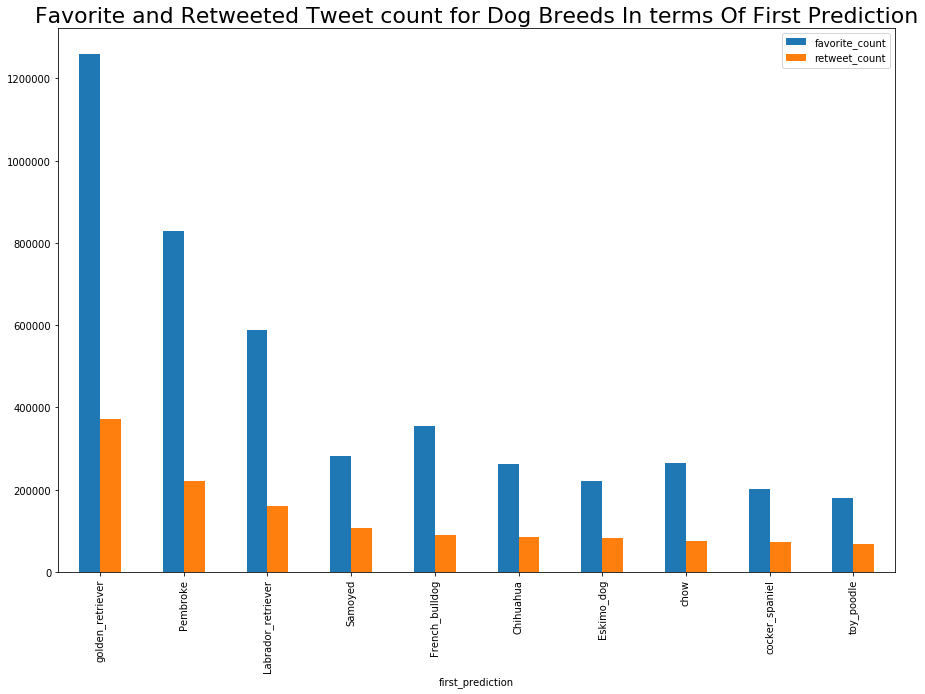

In [32]:
ax1 = prediction_1_df.plot.bar()
ax1.set_title("Favorite and Retweeted Tweet count for Dog Breeds In terms Of First Prediction", fontsize=22)
plt.show()

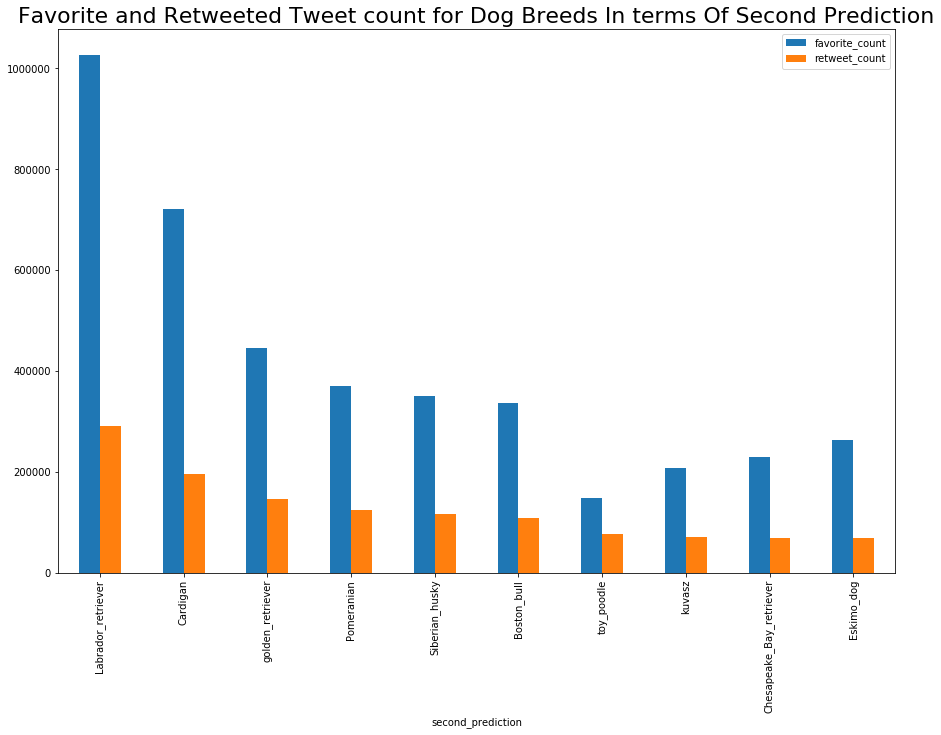

In [33]:
ax2 = prediction_2_df.plot.bar()
ax2.set_title("Favorite and Retweeted Tweet count for Dog Breeds In terms Of Second Prediction", fontsize=22)
plt.show()

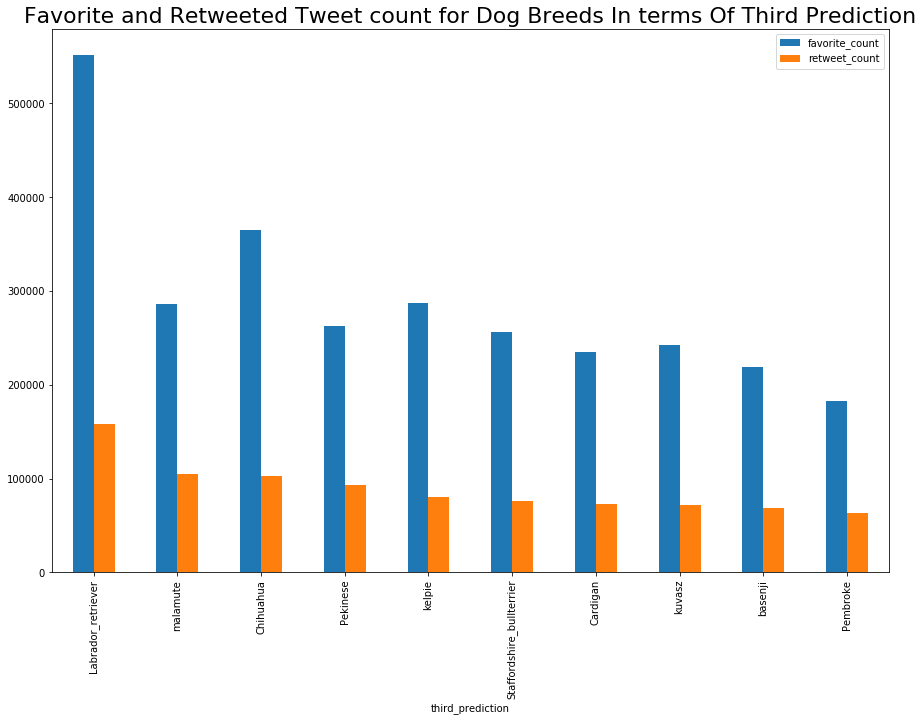

In [34]:
ax3 = prediction_3_df.plot.bar()
ax3.set_title("Favorite and Retweeted Tweet count for Dog Breeds In terms Of Third Prediction", fontsize=22)
plt.show()

#### 5. What is the distribution of dogs' stage?

In [174]:
# show  the distribution of dogs' stage
twitter_analyze_visualize_df['stage'].value_counts()

None       1699
pupper      216
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

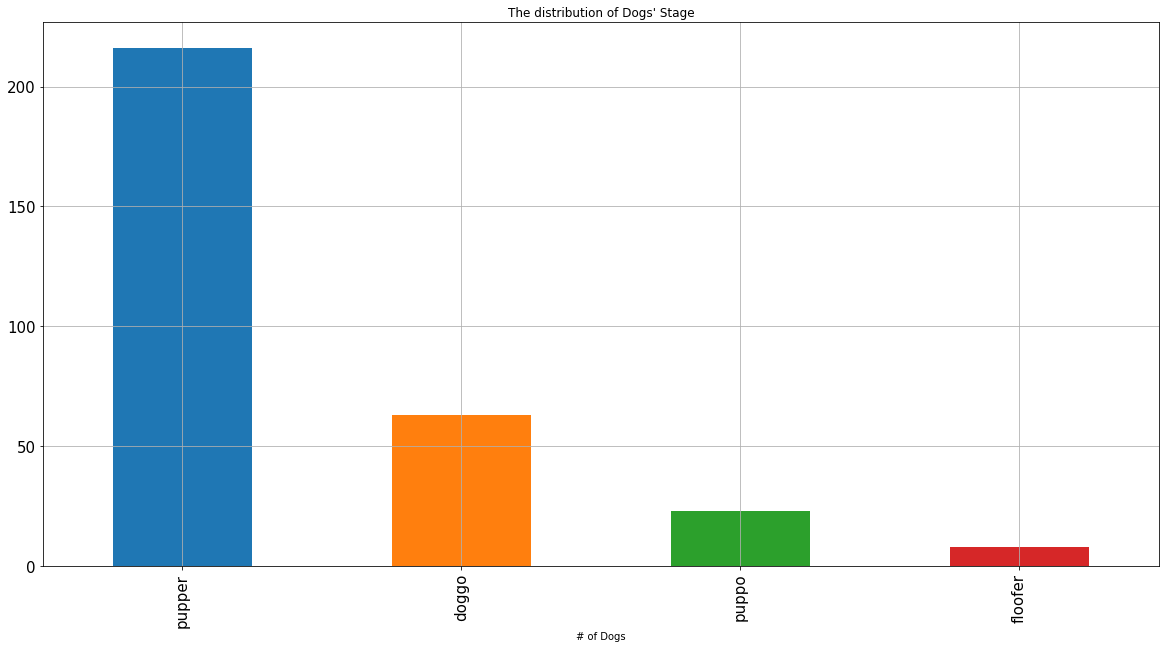

In [175]:
# By not taking into account "None" value, show  the most 10 popular dog names.
dogs_names = twitter_analyze_visualize_df.query('stage != "None"')
most_popular_dog_names_10 = dogs_names['stage'].value_counts().head(10)

most_popular_dog_names_10.plot(kind='bar', figsize=(20,10),grid=True, fontsize =15,
             title = "The distribution of Dogs' Stage").set_xlabel('# of Dogs')
 
plt.show()

#### 6. How have the Retweet and Favorite Counts been changed over the time?

In [60]:
twitter_analyze_visualize_df['timestamp'] = pd.to_datetime(twitter_analyze_visualize_df['timestamp'], errors = 'coerce', format = "%Y-%m-%d %H:%M:%S")

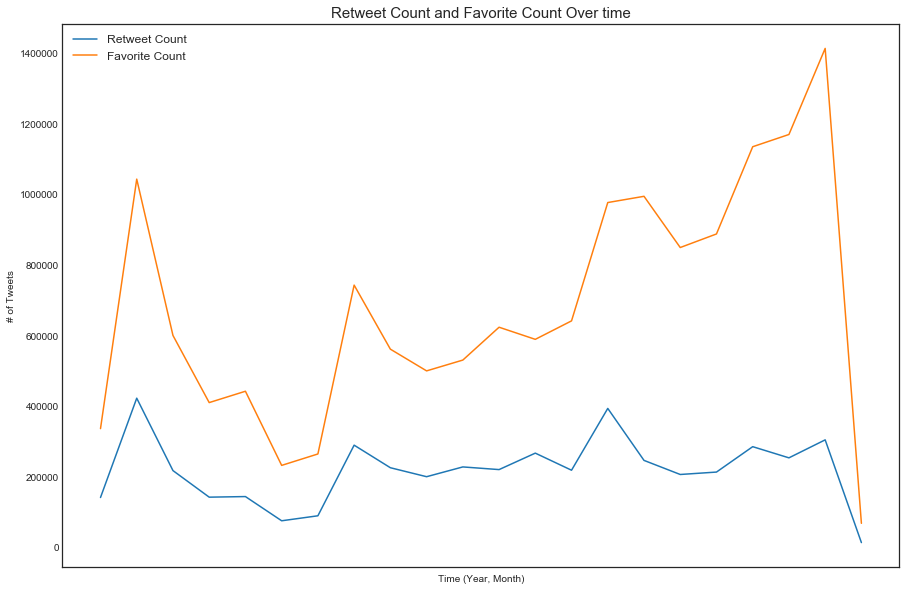

In [61]:
twitter_analyze_visualize_df["retweet_count"].groupby([
                                                          twitter_analyze_visualize_df["timestamp"].dt.year,
                                                          twitter_analyze_visualize_df["timestamp"].dt.month
                                                      ]
                                                     ).sum().plot('line')
twitter_analyze_visualize_df["favorite_count"].groupby([
                                                           twitter_analyze_visualize_df["timestamp"].dt.year,
                                                           twitter_analyze_visualize_df["timestamp"].dt.month
                                                       ]
                                                      ).sum().plot('line')
plt.title('Retweet Count and Favorite Count Over time', size =15)
plt.ylabel('# of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)
plt.show()
plt.rcParams["figure.figsize"] = [15, 10]